<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SARIMA MODELS

ARIMA models accept the parameters (p, d,q) and SARIMA models accept an additional set paramerters (P, D, Q)m  that specifically describes thes seasonal component of the model. 
*P, D*, and *Q*  represent the seasonal regression, differencing and moving average coefficients, and *m* represents the number of data points (rows) in each seasonal cycle.





In [0]:
import pandas as pd
import numpy as np 
%matplotlib inline

In [0]:
# ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
pip install pmdarima

     |████████████████████████████████| 921kB 4.8MB/s 
     |████████████████████████████████| 24.8MB 53.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
from pmdarima import auto_arima

Load CO2 MM dataframe

In [7]:
df = pd.read_csv('co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


Dataset has a 'year' and a 'month' column. These two columns need to be combined and converted to a datetime index. This can be acomplished by creating a new colum 'date' and a dictionary with year and month as key value pairs and assume that the day is the first of each month.

In [0]:
# pytonic way
#df['date'] = dict(year=df['year'], month=df['month'], day=1)

# also can be done this way:

df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'], 'day':1})

In [9]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [10]:
# ensure date is datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.2 KB


In [0]:
# permanently assign date as the index

df = df.set_index('date')

In [12]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [0]:
# set frequency as Monthly Start

df.index.freq = 'MS'

In [14]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


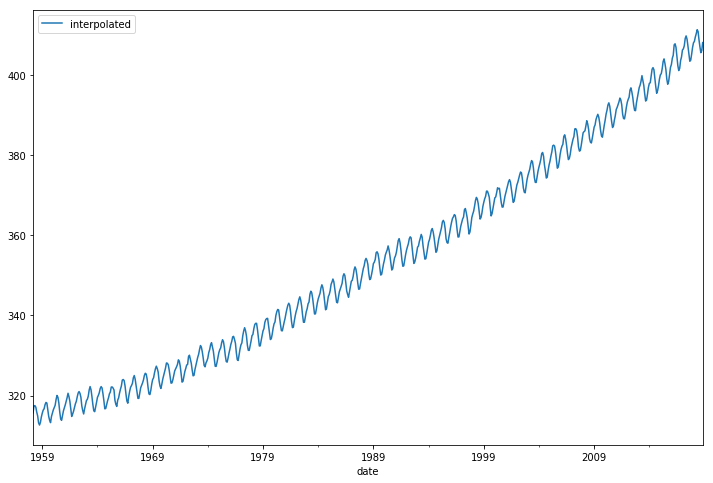

In [15]:
# Visualize Data

df['interpolated'].plot(figsize = (12,8), legend = True);

In [0]:
# Format plot to enhance ETS graph

from pylab import rcParams

rcParams['figure.figsize'] = 12,8


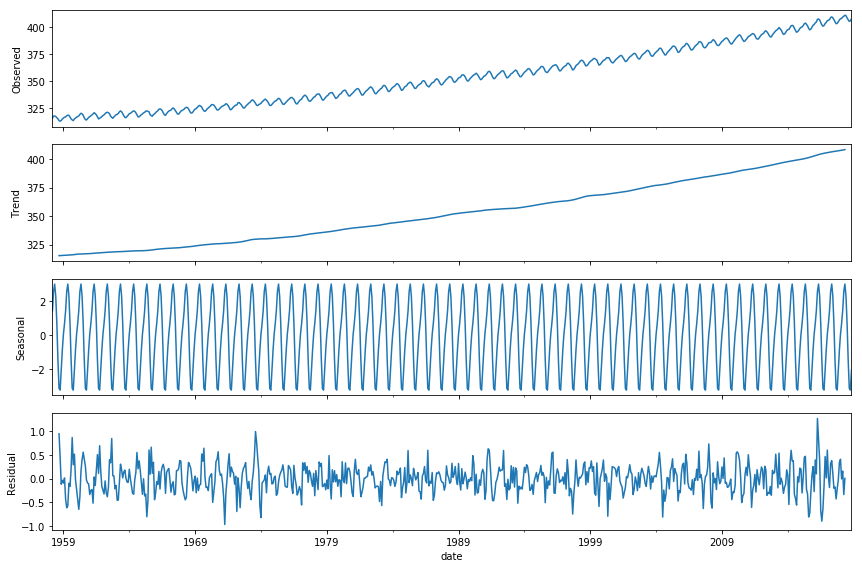

In [17]:
# Run ETS decomposition and visualize it to better understand the data

result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

In [18]:
# Run auto_arima to obtain recommended orders

auto_arima(df['interpolated'], seasonal = True, m=12).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.434
Date:                            Thu, 11 Jul 2019   AIC                            428.867
Time:                                    02:38:55   BIC                            451.819
Sample:                                         0   HQIC                           437.723
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.539e-05      0.000      0.211      0.833      -0.000       0.000
ma.L1         -0.3726      0.035    -10.723      0.000      -0.441      -0.304
ar.S.L12       0.9996      0.000   2875.523      0.000       0.999       1.000
ma.S.L12      -0.8658      0.022    -39.475      0.000      -0.909      -0.823
sigma2         0.0976      0.005     20.059      0.000       0.088       0.107
===================================================================================
Ljung-Box (Q):                       51.90   Jarque-Bera (JB):                 3.69
Prob(Q):                              0.10   Prob(JB):                         0.16
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train the Model

In [19]:
# split data into training and test sets
# check length of dataframe and calulate how much data should be used for testing
len(df)

729

In [0]:
train = df.iloc[:717]
           
# grab the last 12 months for the test set
           
test = df.iloc[717:]

In [0]:
# create model -- pass as parameters the first order of the ARIMA and x as shown in the auto_arima Details
model = SARIMAX(train['interpolated'], order = (0,1,1), seasonal_order=(1,0,1,12))

In [0]:
# fit model
results = model.fit()

In [23]:
# check summary 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.148
Date:                            Thu, 11 Jul 2019   AIC                            418.296
Time:                                    02:38:58   BIC                            436.591
Sample:                                03-01-1958   HQIC                           425.361
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3711      0.034    -10.878      0.000      -0.438      -0.304
ar.S.L12       0.9997      0.000   3239.402      0.000       0.999       1.000
ma.S.L12      -0.8649      0.023    -37.857      0.000      -0.910      -0.820
sigma2         0.0960      0.005     20.209      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.97   Jarque-Bera (JB):                 3.79
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecast

In [0]:
start = len(train)
end = len(train) + len(test) - 1

In [0]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

In [26]:
predictions

2017-12-01    406.583566
2018-01-01    407.786026
2018-02-01    408.531335
2018-03-01    409.436791
2018-04-01    410.996071
2018-05-01    411.599660
2018-06-01    410.818370
2018-07-01    409.126797
2018-08-01    407.025770
2018-09-01    405.575351
2018-10-01    405.846901
2018-11-01    407.381935
Freq: MS, Name: SARIMA Predictions, dtype: float64

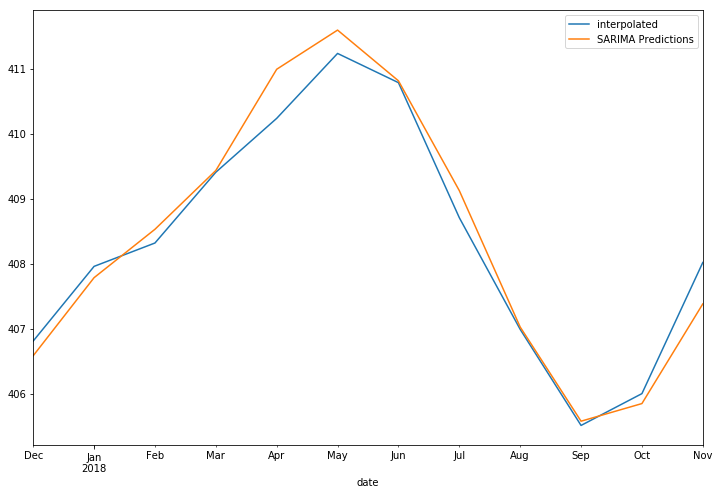

In [27]:
# Plot results

test['interpolated'].plot(legend = True, figsize = (12, 8));
predictions.plot(legend=True);


## Evaluate Model

In [0]:
# Import root mean squared error
from statsmodels.tools.eval_measures import rmse

In [29]:
error = rmse(test['interpolated'], predictions)
error

0.34623686626591743

##  Retrain the Model Using all the Data and Forecast into the Unknown Future

In [0]:
# Create model using all the data in the dataframe

model = SARIMAX(df['interpolated'], order=(0,1,1), seasonal_order=(1,0,1,12))
results = model.fit()

In [0]:
# len(df) --> starts at the end of the df
# len(df)+11 --> one year into the future

forecasted_values = results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA FORECAST')

## Plot Results

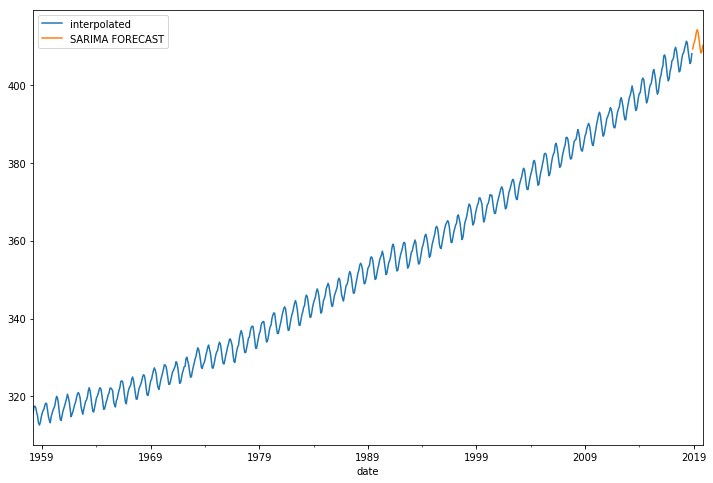

In [32]:
df['interpolated'].plot(legend = True, figsize=(12, 8));
forecasted_values.plot(legend = True);